In [1]:
# Here is the imports
import os

import numpy as np
from matplotlib import pyplot as plt
import cv2
from glob import glob

In [3]:
# Dataset Constants
data_dir = './data/dataset1/data/'
label_dir = './data/dataset1/label/'
IMG_EXT = 'png'
BATCH_SIZE = 1
LR = 0.0001
# Model Constants
BACKBONE = 'efficientnetb3'
# unlabelled 0, iskemik 1, hemorajik 2
CLASSES = ['iskemik', 'kanama']

In [4]:
# helper function for data visualization
def visualize(**images):
    """Plot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        # if whole binary image is true plt shows it as whole image is false so for bypassing this issue we assing one pixels value to 0
        image[1,1] = 0 
        plt.imshow(image)
    plt.show()

def visualize_dataset(img, mask, classes):
    kwarg = {'image': img}
    for i in range(len(classes)):
        kwarg.update({classes[i] : mask[..., i].squeeze()})
    visualize(**kwarg)

# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

['./data/dataset1/data/10080.png', './data/dataset1/data/10095.png', './data/dataset1/data/10096.png', './data/dataset1/data/10141.png', './data/dataset1/data/10215.png', './data/dataset1/data/10381.png', './data/dataset1/data/10443.png', './data/dataset1/data/10476.png', './data/dataset1/data/10630.png', './data/dataset1/data/10755.png']
['./data/dataset1/label/10080.png', './data/dataset1/label/10095.png', './data/dataset1/label/10096.png', './data/dataset1/label/10141.png', './data/dataset1/label/10215.png', './data/dataset1/label/10381.png', './data/dataset1/label/10443.png', './data/dataset1/label/10476.png', './data/dataset1/label/10630.png', './data/dataset1/label/10755.png']


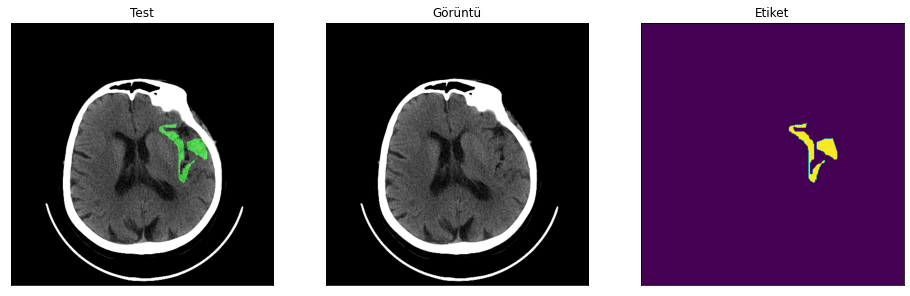

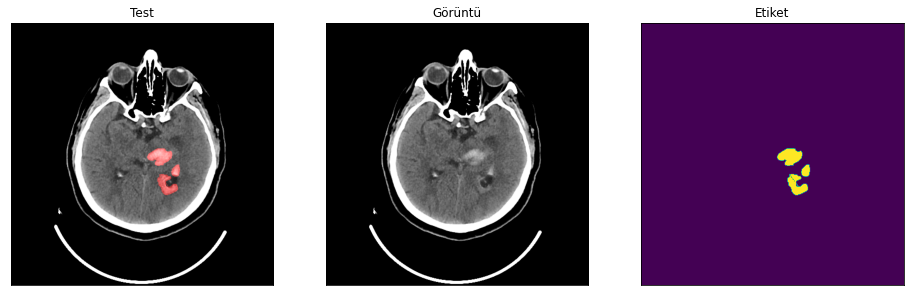

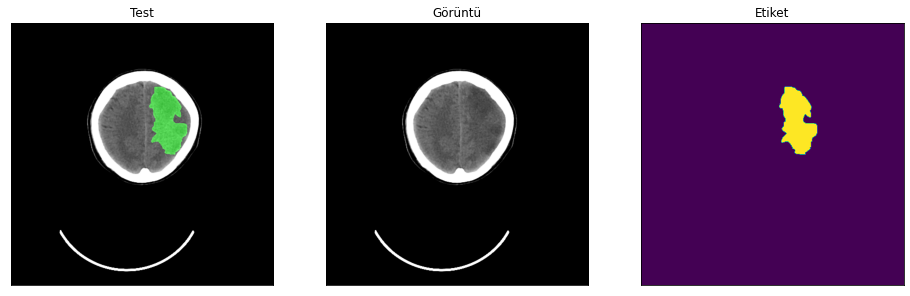

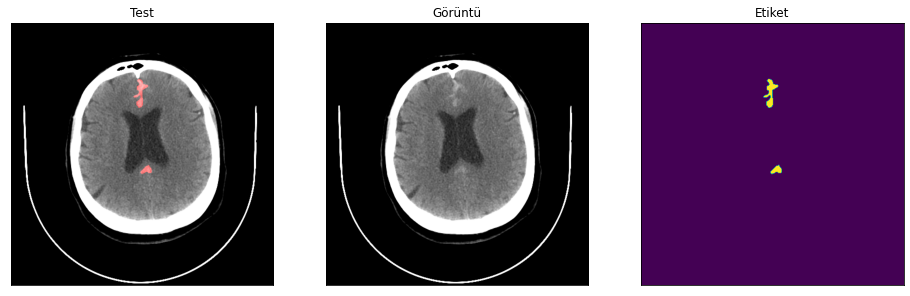

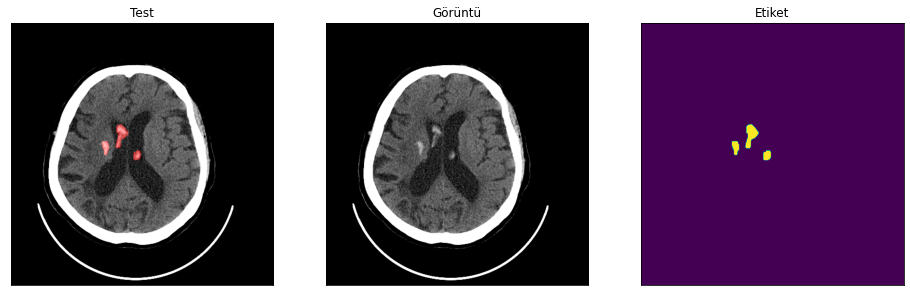

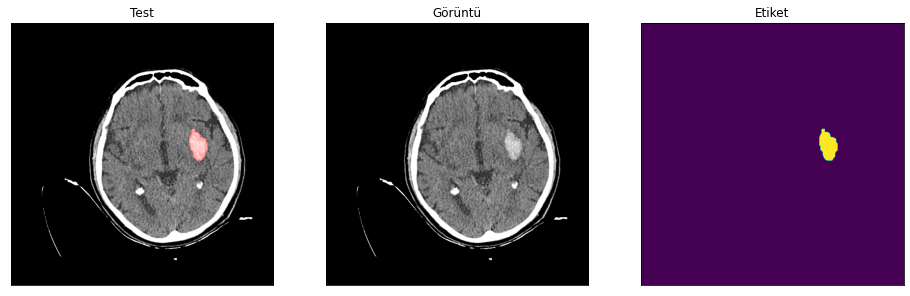

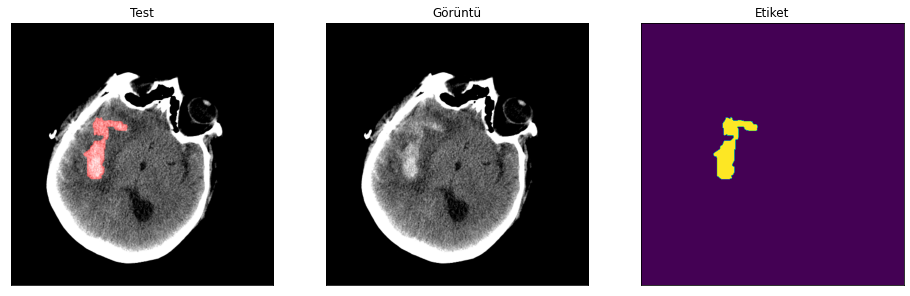

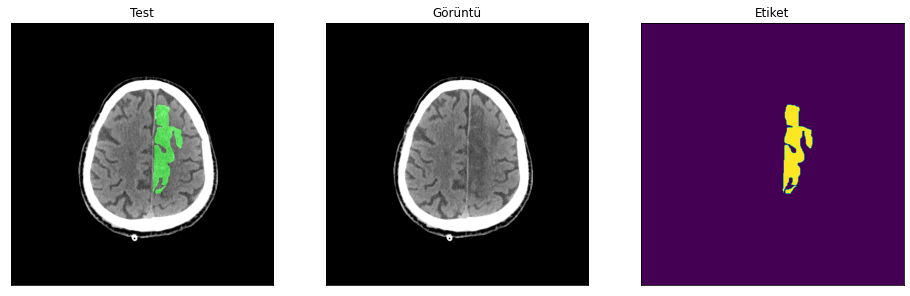

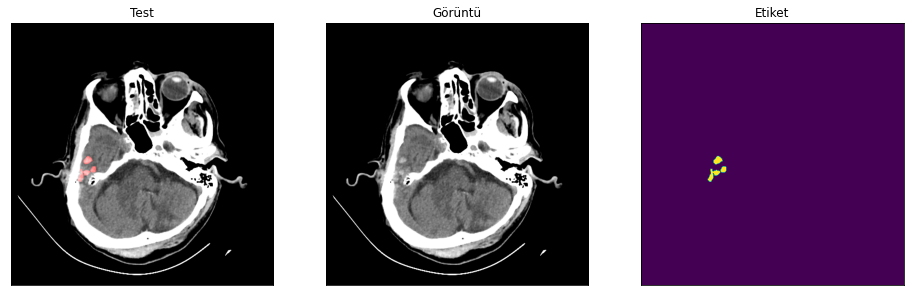

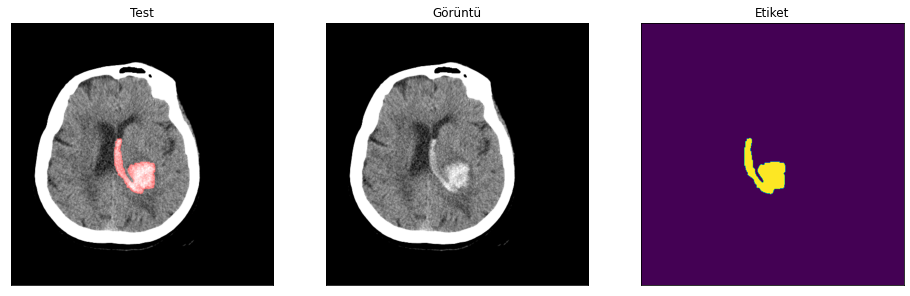

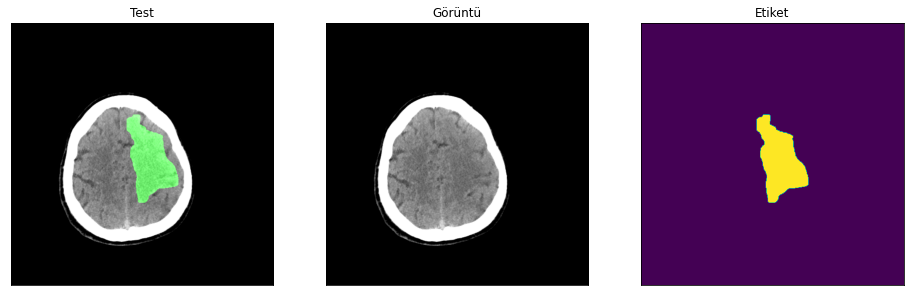

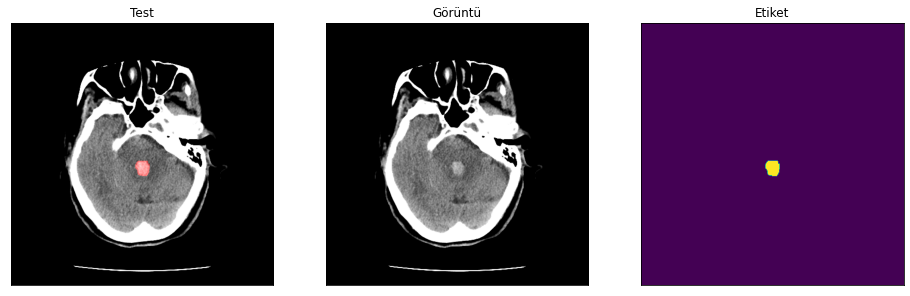

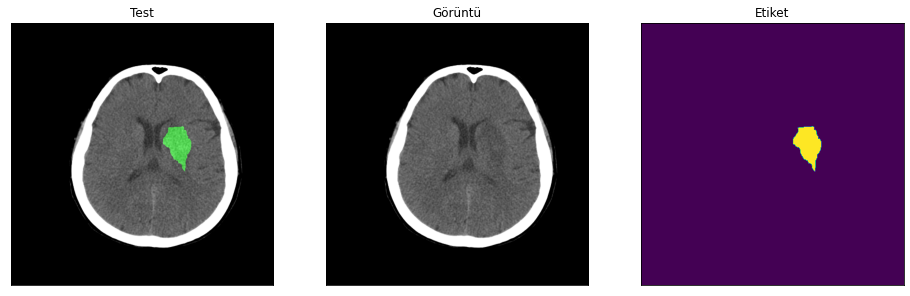

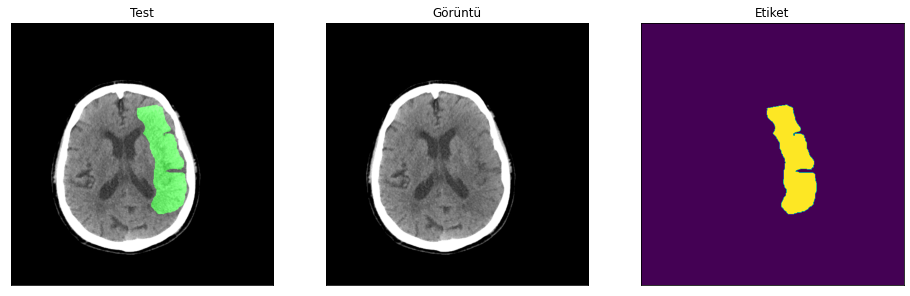

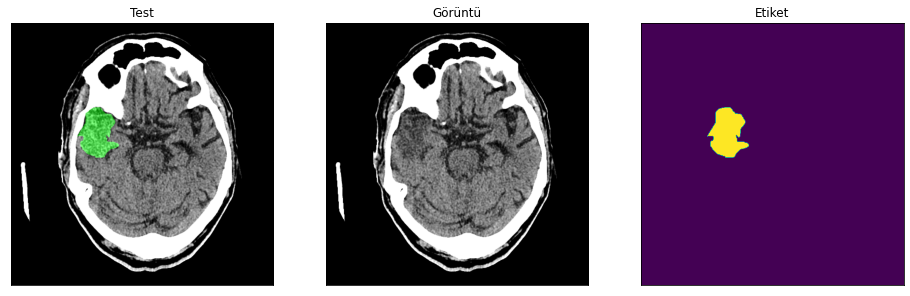

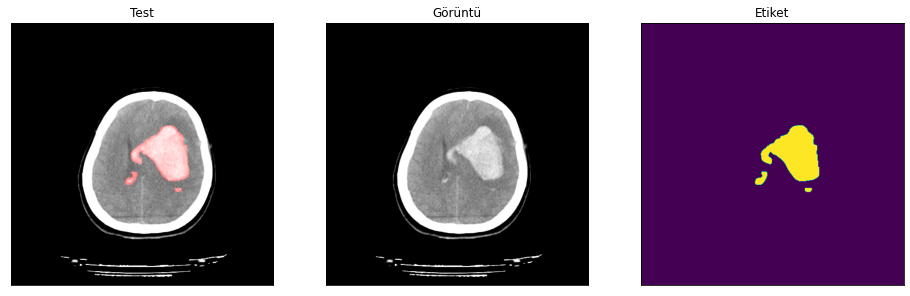

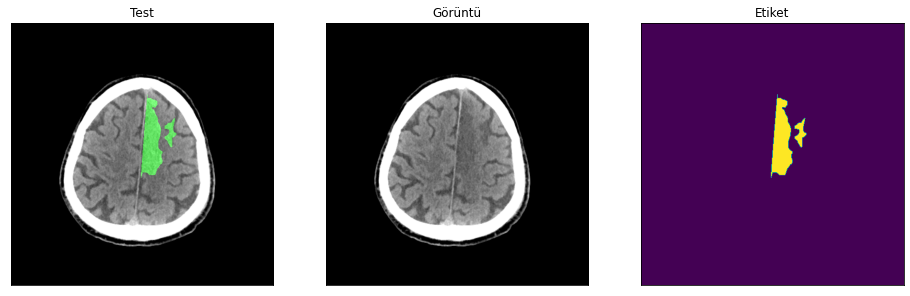

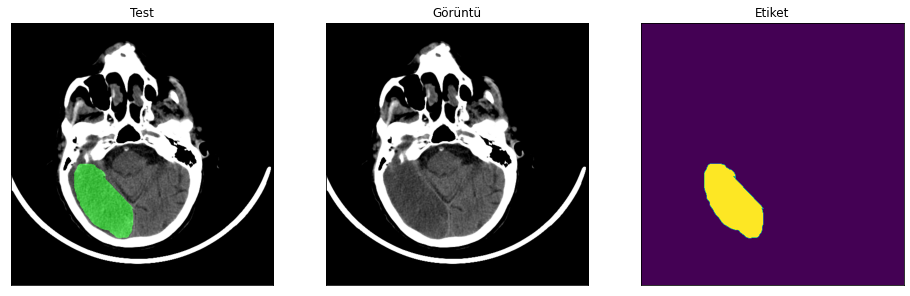

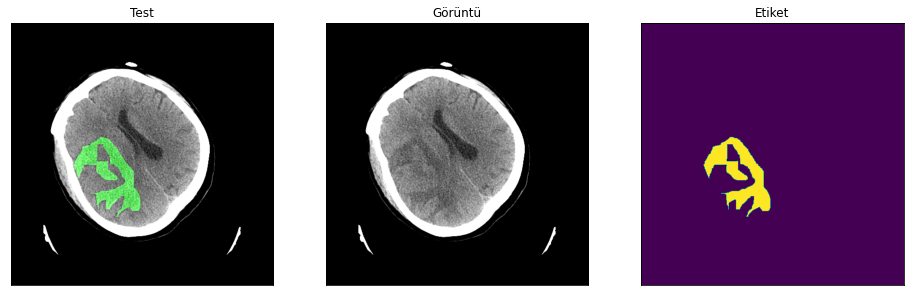

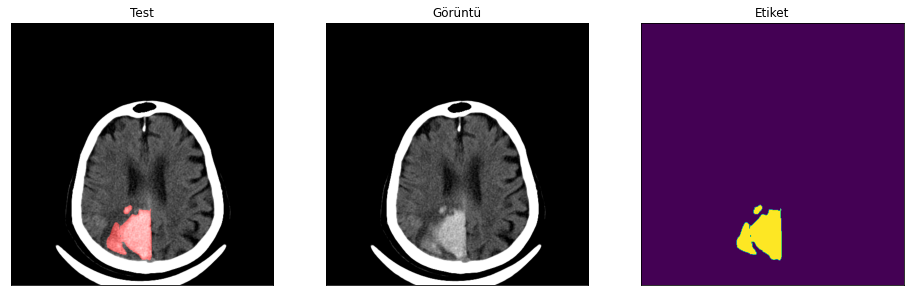

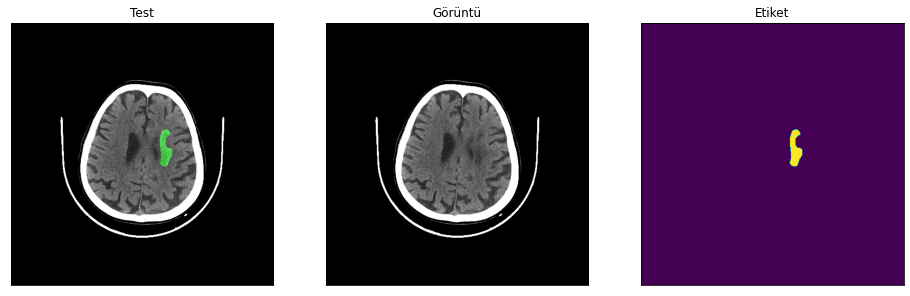

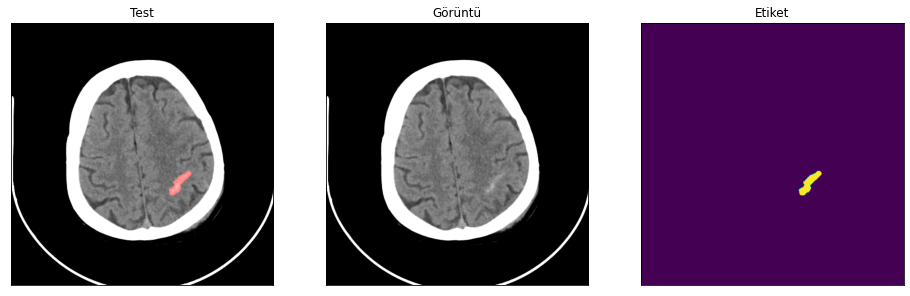

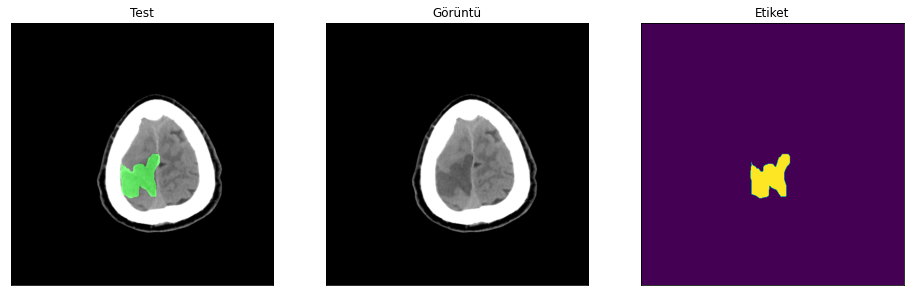

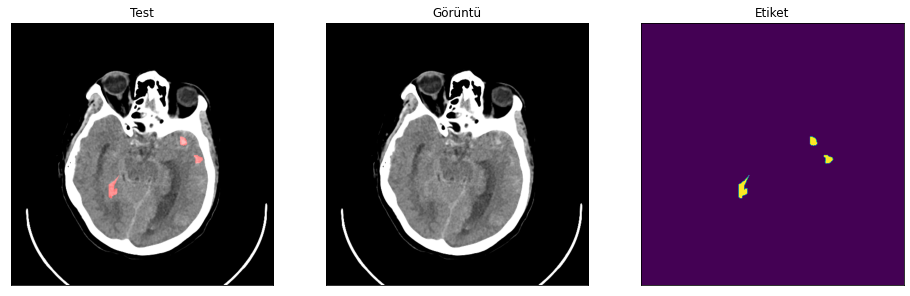

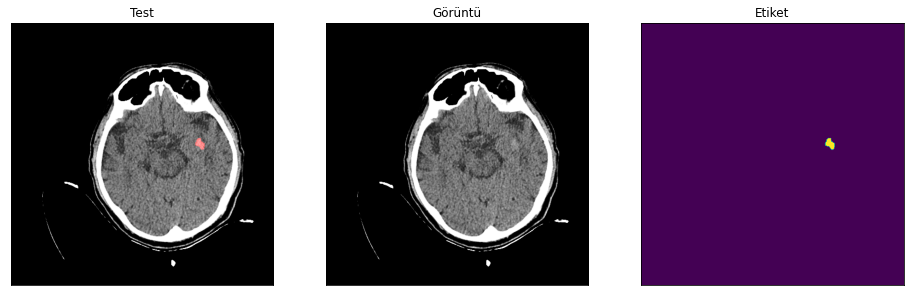

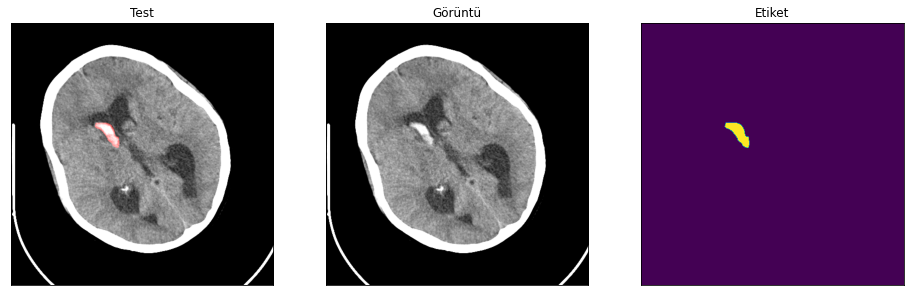

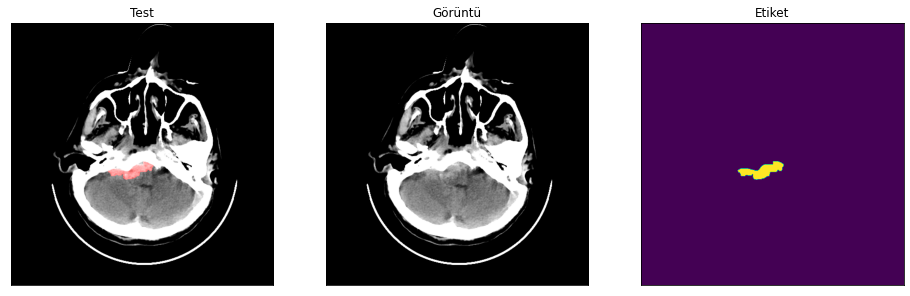

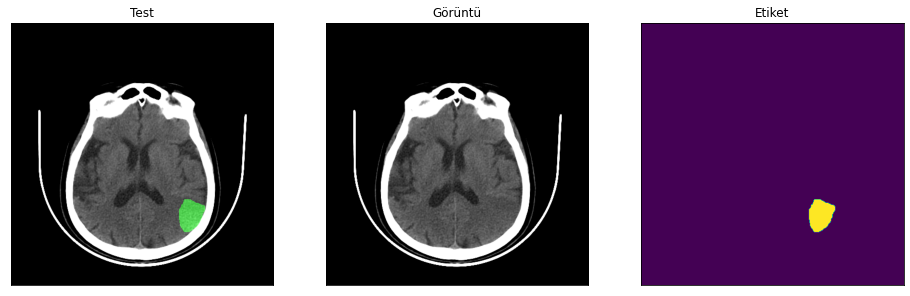

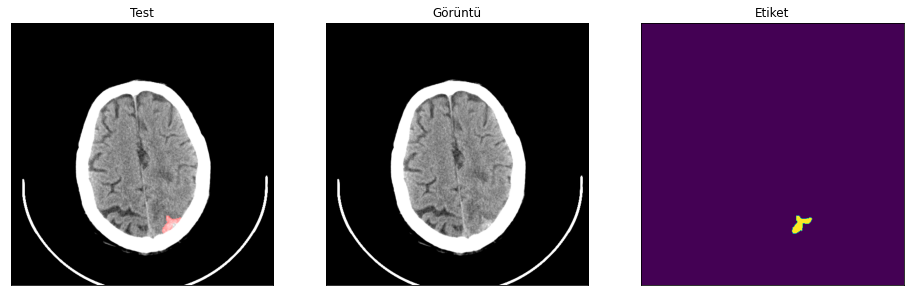

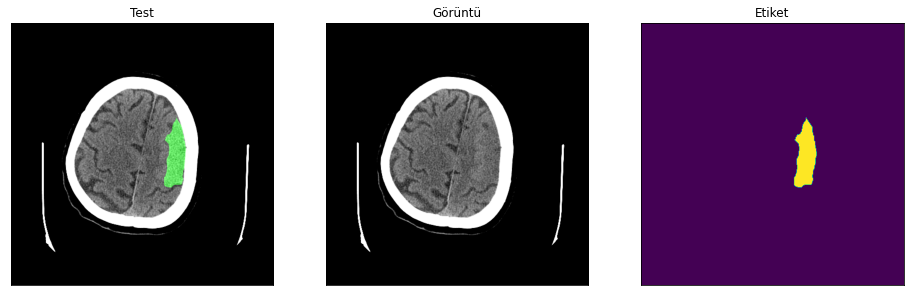

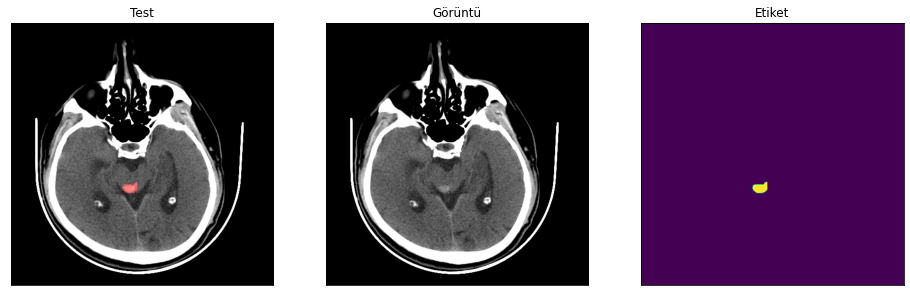

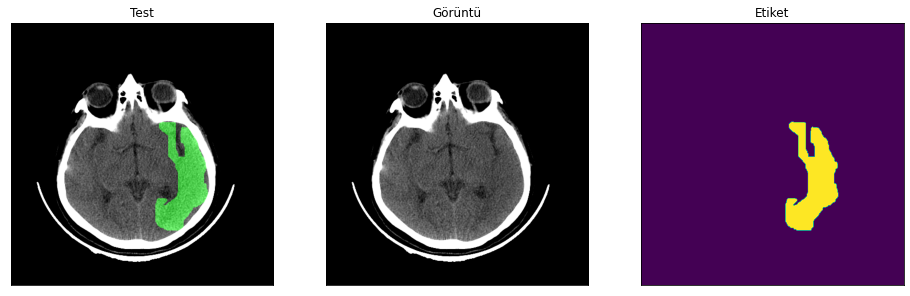

In [5]:
predict_filenames = glob(f"{data_dir}*.{IMG_EXT}")
predict_filenames = sorted(predict_filenames[:100])
label_filenames = [f.replace(data_dir, label_dir) for f in predict_filenames]
print(predict_filenames[:10])
print(label_filenames[:10])
for i in range(len(label_filenames)):
    img = cv2.imread(predict_filenames[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = cv2.imread(label_filenames[i], 0)

    masks = [(label == v) for v in [1, 2, 3]]
    # R G B
    # R 1 iskemik
    # G 2 hemorojik
    mask = np.stack(masks, axis=-1).astype('uint8')
    #print(mask)

    if np.any(label):
        #print(np.where)
        visualize(
            Test=cv2.addWeighted(img, 1, mask*255, 0.5, 0),
            Görüntü=img.squeeze(),
            Etiket=(label*122).squeeze()
            )